<center style="font-size:30px;padding-bottom:10px;color:DarkBlue;">Gestión de Datos</center>
<p>&nbsp;</p>
<center style="font-size:25px;padding-bottom:10px;color:CornFlowerBlue;">Exploración gráfica de datos</center>
<p>&nbsp;</p>
<center style="font-size:18px;">María Barroso Honrubia</center>
<center style="font-size:18px;">Gloria del Valle Cano</center>


In [1]:
library(ggplot2)
library(qgraph)
library(gplots)
library(tidyverse)

# Lectura del dataset de Card Sorting facilitado
data <- read.csv(url("http://cardsorting.net/tutorials/25.csv"))

# Selección de las variables (eliminamos "Uniqid", "Startdate", "Starttime", "Endtime", "QID", "Comment")
data <- subset(data, select = -c(1,3,4,5,6, ncol(data)))
head(data)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Category,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,⋯,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Sides,0,0,0,1,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2,meat,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
3,dinners,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
4,Snacks,0,0,0,0,0,0,1,0,1,⋯,1,0,0,0,0,0,0,0,0,1
5,breakfasat,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,1,0,0,0
6,Fruit and veggie,1,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [3]:
# Separamos los datos numéricos de las categorías correspondientes
freqs <- data[,2:ncol(data)]
head(freqs,10)

,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,Chicken,⋯,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,1,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
6,1,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
8,0,1,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0


In [4]:
# Obtenemos la frecuencia por datos únicos
unique_freqs <- data.frame(table(unlist(freqs)))
unique_freqs

Var1,Freq
<fct>,<int>
0,8669
1,931


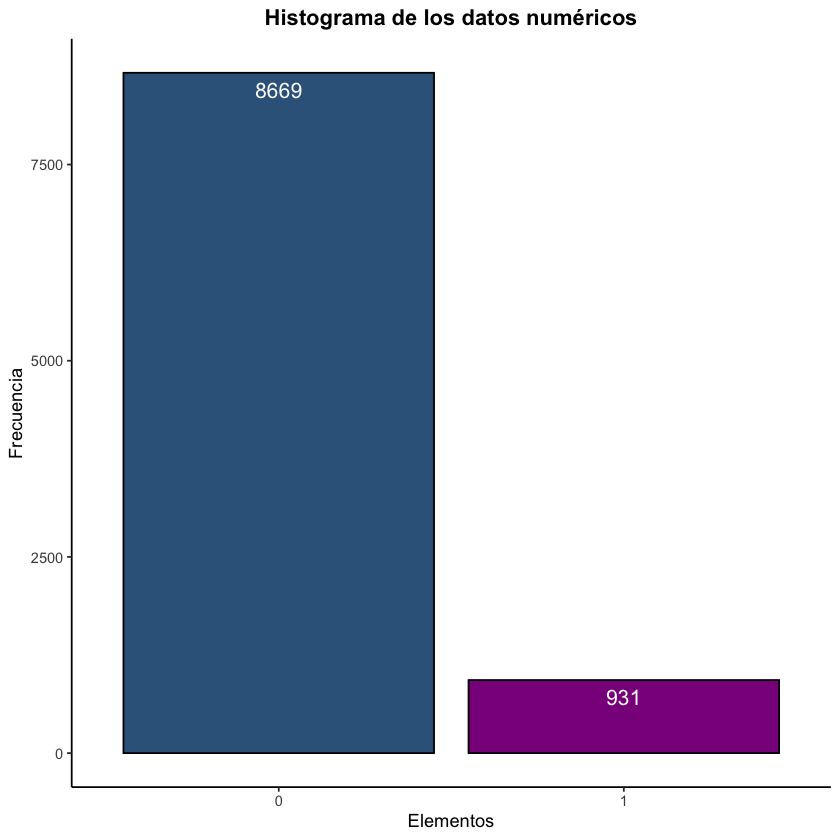

In [5]:
# Representamos un histograma con los datos correspondientes a las tarjetas
ggplot(unique_freqs, aes(x=Var1, y=Freq)) + 
  geom_bar(stat="identity", color="black", fill=c("steelblue4", "darkmagenta"))+
  geom_text(aes(label=Freq), vjust=1.6, color="white", size=4.5)+
  ggtitle("Histograma de los datos numéricos") +
  theme(plot.title = element_text(hjust = 0.5, face="bold")) +
  xlab("Elementos") + ylab("Frecuencia") +
  theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())

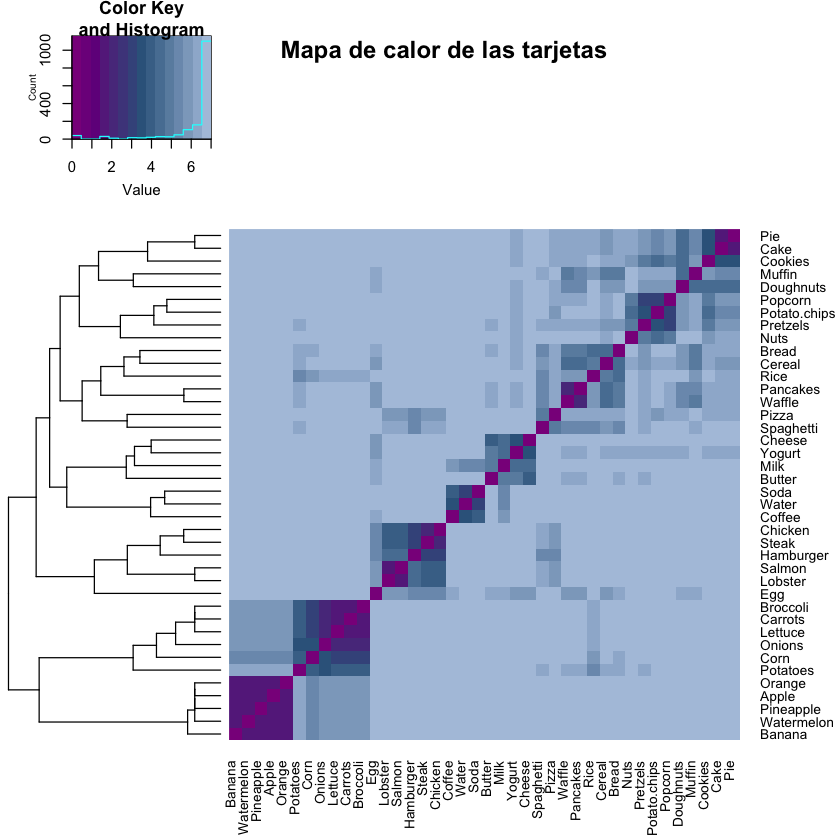

In [6]:
# Calculamos la distancia euclídea entre columnas
distances <- as.matrix(dist(t(freqs), method="euclidean"))
# Mapa de calor correspondiente
my_palette <- colorRampPalette(c("darkmagenta", "steelblue4", "lightsteelblue"))
heatmap.2(distances, col=my_palette, dendrogram='row', Rowv=TRUE, Colv=TRUE, trace='none', symkey=FALSE)
title("Mapa de calor de las tarjetas")

Warning message in qgraph(1/(1 + distances), labels = colnames(distances), layout = "spring", :
“The following arguments are not documented and likely not arguments of qgraph and thus ignored: colors”


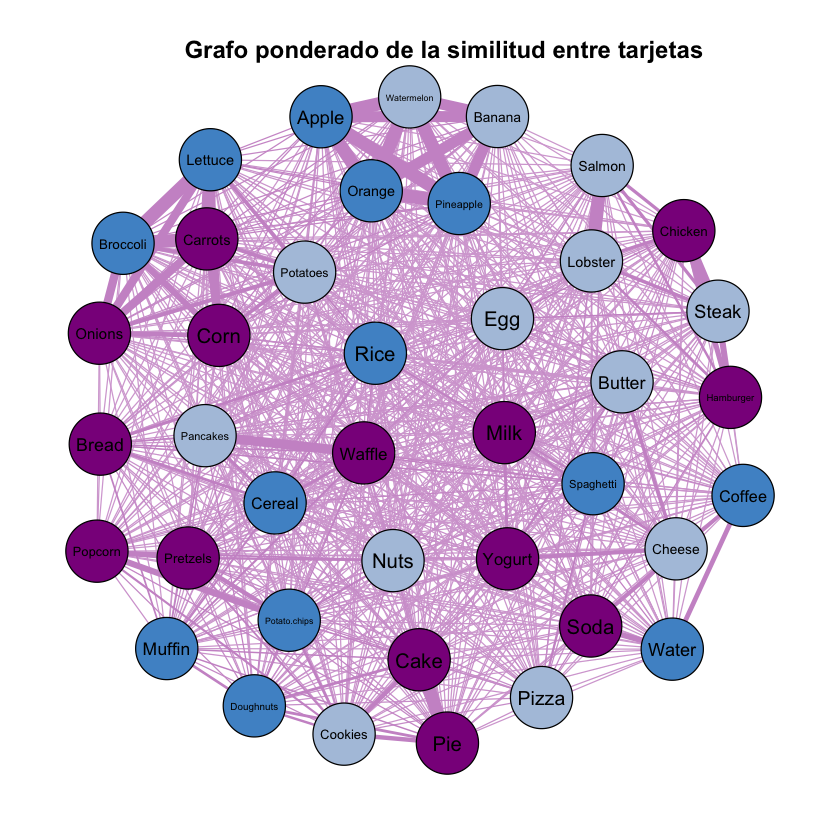

In [8]:
qgraph(1/(1 + distances), labels=colnames(distances), layout="spring", vsize=7, colors=c("darkmagenta", "steelblue3", "lightsteelblue"), edge.color="plum3")
title("Grafo ponderado de la similitud entre tarjetas")

In [12]:
# Obtenemos las tarjetas más relacionadas
which(min(dist(t(freqs), method="euclidean")) == distances, arr.ind=TRUE)

,row,col
Broccoli,5,1
Lettuce,17,1
Orange,23,2
Pineapple,26,2
Watermelon,39,2
Carrots,1,5
Lettuce,17,5
Pie,25,7
Carrots,1,17
Broccoli,5,17
